# Binary classifier

Predict the sentiment of IMDB reviews (negative or positive)

In [22]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import tensorflow as tf

from tensorflow.keras import models, layers, optimizers, losses, metrics
from tensorflow.keras.datasets import imdb

In [3]:
LIMIT_WORD = 10000

In [4]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = LIMIT_WORD)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
C:\Users\90545\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\90545\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths 

In [5]:
train_labels

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [6]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [7]:
train_data.shape

(25000,)

### Data exploring (convert sequences to original review)

In [8]:
def convert_to_english(sequence):
    
    word_index = imdb.get_word_index()
    reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
    decoded_review = " ".join([reverse_word_index.get(i - 3, "?") for i in sequence])
    
    return decoded_review

In [9]:
print(convert_to_english(train_data[5]))

? begins better than it ends funny that the russian submarine crew ? all other actors it's like those scenes where documentary shots br br spoiler part the message ? was contrary to the whole story it just does not ? br br


### Prepare the data (convert sequences into tensors)

In [10]:
def vectorize_sequences(sequences, dimension = LIMIT_WORD):
    
    result = np.zeros((len(sequences), dimension))
    
    for i, sequence in enumerate(sequences):
        result[i, sequence] = 1
        
    return result

#### Vectorize examples

In [11]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train[:10]

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

#### Vectorize labels

In [13]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [14]:
y_train[:5]

array([1., 0., 0., 1., 0.], dtype=float32)

### Building the network

#### Architecture

- 2 intermediate Dense layers with 16 hidden unites per each (relu actovation function)
- 1 output layer (with sigmoid activation function)

In [15]:
model = models.Sequential()

In [16]:
model.add(layers.Dense(16, activation = "relu", input_shape = (LIMIT_WORD, )))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [17]:
model.compile(optimizer = optimizers.RMSprop(lr = 0.001),
             loss = losses.binary_crossentropy,
             metrics = [metrics.binary_accuracy])

In [20]:
x_train.shape

(25000, 10000)

In [18]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
history = model.fit(partial_x_train, 
                    partial_y_train, 
                    epochs = 20, 
                    batch_size = 512, 
                    validation_data = (x_val, y_val))

Epoch 1/20
30/30 [==============================] - 48s 1s/step - loss: 0.6256 - binary_accuracy: 0.6646 - val_loss: 0.4348 - val_binary_accuracy: 0.8473
Epoch 2/20
30/30 [==============================] - 2s 81ms/step - loss: 0.3688 - binary_accuracy: 0.8918 - val_loss: 0.3443 - val_binary_accuracy: 0.8663
Epoch 3/20
30/30 [==============================] - 2s 73ms/step - loss: 0.2504 - binary_accuracy: 0.9292 - val_loss: 0.2864 - val_binary_accuracy: 0.8893
Epoch 4/20
30/30 [==============================] - 2s 65ms/step - loss: 0.1936 - binary_accuracy: 0.9394 - val_loss: 0.2929 - val_binary_accuracy: 0.8826
Epoch 5/20
30/30 [==============================] - 2s 67ms/step - loss: 0.1561 - binary_accuracy: 0.9522 - val_loss: 0.2768 - val_binary_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 2s 71ms/step - loss: 0.1209 - binary_accuracy: 0.9650 - val_loss: 0.2863 - val_binary_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 2s 67ms/step - loss

### Plot results

#### Training and validation loss

Text(0, 0.5, 'Loss')

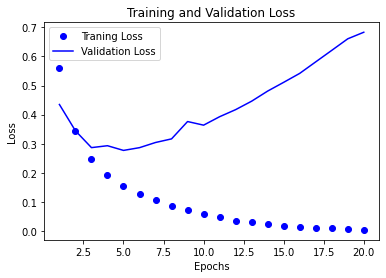

In [26]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

acc = history_dict["binary_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, "bo", label = "Traning Loss")
plt.plot(epochs, val_loss_values, "b", label = "Validation Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Accuracy')

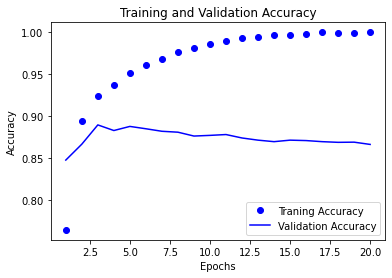

In [27]:
history_dict = history.history
acc_values = history_dict["binary_accuracy"]
val_acc_values = history_dict["val_binary_accuracy"]

acc = history_dict["binary_accuracy"]
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc_values, "bo", label = "Traning Accuracy")
plt.plot(epochs, val_acc_values, "b", label = "Validation Accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

Displayed above we have an example of **overfitting**. To prevent it, in this case could be sufficient to train the network for 4 epochs only

In [52]:
model = models.Sequential()

In [53]:
model.add(layers.Dense(16, activation = "relu", input_shape = (LIMIT_WORD, )))
model.add(layers.Dense(16, activation = "relu"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [54]:
model.compile(optimizer = optimizers.RMSprop(lr = 0.001), 
             loss = losses.binary_crossentropy, 
             metrics = metrics.binary_accuracy)

In [55]:
model.fit(x_train, y_train, epochs = 4, batch_size = 512)

Epoch 1/4
49/49 [==============================] - 15s 54ms/step - loss: 0.5365 - binary_accuracy: 0.7319
Epoch 2/4
49/49 [==============================] - 2s 47ms/step - loss: 0.2584 - binary_accuracy: 0.9141
Epoch 3/4
49/49 [==============================] - 2s 47ms/step - loss: 0.1910 - binary_accuracy: 0.9352: 1s - loss: 0.
Epoch 4/4
49/49 [==============================] - 2s 47ms/step - loss: 0.1523 - binary_accuracy: 0.9483


In [56]:
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 [==============================] - 6s 6ms/step - loss: 0.2964 - binary_accuracy: 0.8821


In [57]:
print("test_acc: ", test_acc * 100)

test_acc:  88.20800185203552
